<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Построение-и-выбор-наилучшей-модели" data-toc-modified-id="Построение-и-выбор-наилучшей-модели-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Построение и выбор наилучшей модели</a></span></li></ul></div>

# Восстановление золота из руды

Необходимо подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Использовать данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

**Описание данных**

* `gold_industry_train.csv` — обучающая выборка;
* `gold_industry_test.csv` — тестовая выборка;
* `gold_industry_full.csv` — исходные данные.

## Подготовка данных

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [2]:
data_train = pd.read_csv('/datasets/gold_industry_train.csv')
data_test = pd.read_csv('/datasets/gold_industry_test.csv')
data_full = pd.read_csv('/datasets/gold_industry_full.csv')

In [3]:
pd.options.mode.chained_assignment = None
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
display(data_train.info())
display(data_test.info())
display(data_full.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64
 9   rougher.state.floatbank10_a_air             4859 non-null   float64
 10  rougher.stat

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 8   rougher.input.floatbank10_xanthate                  19431 non-null  float64


None

In [5]:
display(data_train.head())
display(data_test.head())
display(data_full.head())

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,11.836743,6.005818,41885.707031,3481.779053,3520.337158,2.838687,19.793808,11.500771,7.101074,28.029297,87.107763,1.170244,5.008018,0.508728,19.154297,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,34.174427,8.547551,10.389648,19.529297,2.106679,14.936526,2.534912,7.476074,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,2.606185,14.500184,4.694824,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,-400.065196,1600.754587,-449.953435,1600.47

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,-299.862743,1147.248241,-500.363165,1047.279065,-500.354091,948.756608,-498.439416,849.441918,-499.255503,850.112246,-499.407112,6.168939,9.309852,95.248427,8.078957,6.500000,1.283045,1648.759906,-399.862053,1650.135395,-399.957321,1648.831890,-400.586116,1649.464582,-400.673303,34.940919,-500.150510,30.031867,-500.328335,26.033990,-500.147792,22.952306,-500.037678,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,-299.907308,1154.087804,-500.036580,1054.009756,-500.237335,944.138793,-496.866953,851.589767,-499.040466,851.345606,-499.122561,6.209517,9.297194,98.880538,7.984164,6.500000,1.241969,1646.547763,-398.977083,1648.212240,-400.383265,1648.917387,-399.521344,1651.498591,-399.745329,34.980742,-498.131002,29.968453,-586.013330,25.971737,-499.608392,22.958448,-499.821308,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,-300.124116,1150.754676,-499.986009,1049.182824,-500.014696,948.085464,-499.997003,850.170086,-500.270334,849.557905,-500.198702,7.358308,9.000624,119.497545,8.003752,6.500000,1.259741,1647.368779,-399.788506,1648.395206,-400.166490,1648.953828,-400.468641,1649.821569,-400.071884,34.952967,-501.204647,29.927025,-500.106628,25.978253,-499.890060,23.004376,-500.014529,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,-299.778385,1152.512559,-500.338106,1052.601592,-499.695075,955.171539,-500.294989,851.957342,-499.779541,850.765662,-501.030559,6.929364,8.920717,108.080163,7.970121,6.660000,0.774909,1652.660845,-399.702218,1651.203128,-400.291472,1651.924848,

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,11.836743,6.005818,41885.707031,3481.779053,3520.337158,2.838687,19.793808,11.500771,7.101074,28.029297,87.107763,1.170244,5.008018,0.508728,19.154297,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,34.174427,8.547551,10.389648,19.529297,2.106679,14.936526,2.534912,7.476074,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,2.606185,14.500184,4.694824,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,-400.065196,1600.754587,-449.953435,1600.47

In [6]:
display(data_train.describe())
display(data_test.describe())
display(data_full.describe())

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
count,14579.000000,14579.000000,14507.000000,14502.000000,14572.000000,14478.000000,14548.000000,14572.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14150.000000,14579.000000,14579.000000,14579.000000,14543.000000,14172.000000,1.457800e+04,14578.000000,14578.000000,14579.000000,14579.000000,14579.000000,14579.000000,14561.000000,14579.000000,14579.000000,14578.000000,14579.000000,14579.000000,14556.000000,14551.000000,14579.000000,14518.000000,1.457600e+04,14579.000000,1.457600e+04,14579.000000,1.457900e+04,14579.000000,1.457800e+04,14579.000000,14579.000000,14579.000000,14491.000000,14314.000000,14579.000000,14575.000000,14573.000000,14534.000000,14485.000000,14579.000000,14557.000000,14579.000000,14567.000000,14579.000000,14579.000000,14579.000000,14574.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14578.000000,14579.000000,14579.000000,14578.000000,14575.000000,13659.000000,14579.000000,14578.000000,14578.000000,14387.000000,14579.000000,14579

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,4860.000000,4860.000000,4832.000000,4838.000000,4856.000000,4816.000000,4857.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4860.000000,4860.000000,4853.000000,4860.000000,4860.000000,4860.000000,4852.000000,4814.000000,4859.000000,4851.000000,4860.000000,4817.000000,4859.000000,4859.000000,4859.000000,4859.000000,4858.000000,4859.000000,4858.000000,4859.000000,4734.000000,4859.000000,4859.000000,4859.000000,4.859000e+03,4859.000000,4.859000e+03,4859.000000,4.859000e+03,4859.000000,4.859000e+03,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000
mean,8.005584,8.547348,3.579662,37.095864,490.285103,59.113400,12.055735,6.101308,1108.635895,-368.340127,1312.346061,-472.506533,1291.638282,-472.902514,1204.066585,-473.380689,1075.304980,-471.465792,1023.769668,-471.412834,11.969074,6.119323,143.201672,8.692446,7.305514,1.007577,1588.387039,-488.223175,1589.297134,-490.255893,1588.905465,-489.741555,1530.287801,-485.896489,29.488451,-499.504602,24.732293,-499.556727,2.889647e+01,-489.475315,2.263273e+01,-494.765779,1.985770e+01,-488.665140,1.557025e+01,-464.176507,16.594103,-490.815250,12.945971,-489.583564,19.053888,-504.678924
std,1.993590,1.958601,1.029377,4.926284,94.371623,19.125122,3.407642,1.042754,156.493143,91.155929,159.001709,49.376824,180.203670,47.611728,184.547737,47.828848,159.989533,51.413832,147.827669,51.838763,3.456113,1.049065,42.360060,3.169592,0.588602,0.494669,124.942960,36.672631,132.102797,35.203702,132.689236,33.650676,256.268884,43.296128,5.357783,43.284386,5.484220,43.619785,6.159087e+00,51.827314,5.456797e+00,40.681493,5.913105e+00,44.392714,4.927361e+00,65.706994,5.724305,32.258443,5.533176,37.084609,5.548996,38.690186
min,0.010000,0.010000,0.010000,0.010000,0.012786,0.046369,0.018907,0.015783,300.792494,-600.568138,767.656587,-649.997496,831.537936,-552.657032,706.281918,-648.118446,695.211786,-598.926149,539.633937,-649.376184,0.000163,0.002616,7.329299,0.000000,4.970000,0.000154,314.241165,-653.477578,319.959489,-799.260788,273.536823,-709.213816,131.321672,-799.791618,0.122013,-799

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
count,19439.000000,19439.000000,19339.000000,19340.000000,19428.000000,19294.000000,19405.000000,19431.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19439.000000,19439.000000,19003.000000,19439.000000,19439.000000,19439.000000,19395.000000,18986.000000,1.943700e+04,19437.000000,19437.000000,19439.000000,19439.000000,19439.000000,19439.000000,19416.000000,19439.000000,19439.000000,19438.000000,19439.000000,19439.000000,19415.000000,19402.000000,19439.000000,19335.000000,1.943500e+04,19438.000000,1.943500e+04,19438.000000,1.943700e+04,19438.000000,1.943600e+04,19438.000000,19439.000000,19439.000000,19323.000000,19069.000000,19439.000000,19435.000000,19418.000000,19377.000000,19219.000000,19438.000000,19416.000000,19438.000000,19426.000000,19438.000000,19438.000000,19438.000000,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000,19439.000000,19437.000000,19427.000000,17691.000000,19439.000000,19438.000000,19438.000000,19228.000000,19439.000000,19439

In [7]:
display(data_train.isna().sum())
display(data_test.isna().sum())
display(data_full.isna().sum())

date                                                    0
rougher.input.feed_au                                   0
rougher.input.feed_ag                                   0
rougher.input.feed_pb                                  72
rougher.input.feed_sol                                 77
rougher.input.feed_rate                                 7
rougher.input.feed_size                               101
rougher.input.floatbank10_sulfate                      31
rougher.input.floatbank10_xanthate                      7
rougher.state.floatbank10_a_air                         0
rougher.state.floatbank10_a_level                       0
rougher.state.floatbank10_b_air                         0
rougher.state.floatbank10_b_level                       0
rougher.state.floatbank10_c_air                         0
rougher.state.floatbank10_c_level                       0
rougher.state.floatbank10_d_air                         0
rougher.state.floatbank10_d_level                       0
rougher.state.

date                                            0
rougher.input.feed_au                           0
rougher.input.feed_ag                           0
rougher.input.feed_pb                          28
rougher.input.feed_sol                         22
rougher.input.feed_rate                         4
rougher.input.feed_size                        44
rougher.input.floatbank10_sulfate               3
rougher.input.floatbank10_xanthate              1
rougher.state.floatbank10_a_air                 1
rougher.state.floatbank10_a_level               1
rougher.state.floatbank10_b_air                 1
rougher.state.floatbank10_b_level               1
rougher.state.floatbank10_c_air                 1
rougher.state.floatbank10_c_level               1
rougher.state.floatbank10_d_air                 0
rougher.state.floatbank10_d_level               0
rougher.state.floatbank10_e_air                 7
rougher.state.floatbank10_e_level               0
rougher.state.floatbank10_f_air                 0


date                                                     0
rougher.input.feed_au                                    0
rougher.input.feed_ag                                    0
rougher.input.feed_pb                                  100
rougher.input.feed_sol                                  99
rougher.input.feed_rate                                 11
rougher.input.feed_size                                145
rougher.input.floatbank10_sulfate                       34
rougher.input.floatbank10_xanthate                       8
rougher.state.floatbank10_a_air                          1
rougher.state.floatbank10_a_level                        1
rougher.state.floatbank10_b_air                          1
rougher.state.floatbank10_b_level                        1
rougher.state.floatbank10_c_air                          1
rougher.state.floatbank10_c_level                        1
rougher.state.floatbank10_d_air                          0
rougher.state.floatbank10_d_level                       

In [8]:
display(data_train.shape)
display(data_test.shape)
display(data_full.shape)

(14579, 87)

(4860, 53)

(19439, 87)

In [9]:
data_full.corr()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
rougher.input.feed_au,1.000000,0.845274,0.687003,0.094392,-0.190381,-0.152634,0.294588,0.208971,0.154849,-0.102113,-0.110896,-0.027711,-0.105514,-0.020486,-0.146770,-0.016977,-0.155476,0.008516,-0.190439,0.010265,0.248287,0.208769,-0.012053,-0.070768,-0.068910,0.034491,0.232677,0.305916,0.004302,0.221388,0.183814,0.379195,0.471177,0.094770,-0.219683,0.620644,0.399121,0.132383,0.238643,0.025876,-0.061465,0.062629,-0.044510,0.007873,-0.052286,0.129205,-0.084724,-0.119264,0.442915,0.204538,0.476985,0.290565,0.220107,0.306911,0.431834,-0.155525,-0.035532,-0.089387,-0.033739,-0.019600,0.044110,0.016690,-0.010061,-0.063298,0.080605,0.037087,-0.049987,-0.162136,0.055641,-0.127207,0.089231,0.005793,-0.080820,0.144300,0.079168,-0.168546,0.242171,0.035095,0.315817,-0.079812,0.474520,0.295343,0.642479,0.594311,0.494324,-0.008907
rougher.input.feed_ag,0.845274,1.000000,0.496579,0.115878,-0.134165,-0.110868,0.106487,0.231607,0.278293,-0.124046,-0.126267,-0.057898,-0.149086,-0.049670,-0.167924,-0.045655,-0.113799,-0.042182,-0.160578,-0.038448,0.091833,0.219753,-0.013346,-0.0

In [10]:
data_full.duplicated().sum()

0

In [11]:
C = data_train['rougher.output.concentrate_au']
F = data_train['rougher.input.feed_au']
T = data_train['rougher.output.tail_au']
data_train_recovery = (C * (F - T)) / (F * (C - T)) * 100
print(mean_absolute_error(data_train_recovery, data_train['rougher.output.recovery']))

9.83758577644259e-15


    Значение MAE между расчетами и значением признака очень маленькое, значит эффективность обогащения рассчитана правильно.

In [12]:
data_full = data_full.fillna(method='ffill')
data_full.isna().sum()

date                                                  0
rougher.input.feed_au                                 0
rougher.input.feed_ag                                 0
rougher.input.feed_pb                                 0
rougher.input.feed_sol                                0
rougher.input.feed_rate                               0
rougher.input.feed_size                               0
rougher.input.floatbank10_sulfate                     0
rougher.input.floatbank10_xanthate                    0
rougher.state.floatbank10_a_air                       0
rougher.state.floatbank10_a_level                     0
rougher.state.floatbank10_b_air                       0
rougher.state.floatbank10_b_level                     0
rougher.state.floatbank10_c_air                       0
rougher.state.floatbank10_c_level                     0
rougher.state.floatbank10_d_air                       0
rougher.state.floatbank10_d_level                     0
rougher.state.floatbank10_e_air                 

        Данные были считаны из трех файлов и записаны в переменные data_train - обучающая выборка, data_test - тестовая
     выборка и data_full - полная выборка. Рассчитано значение MAE между расчетами и значением признака в обучающей выборке.
     Значение MAE очень маленькое, значит расчеты были произведены верно. Дубликатов в значениях найдено не было. Были 
     найдены и заполнены пропуски. Так как по ТЗ известно, что соседние по времени параметры часто похожи, пропуски 
     заполнены ближайшим по времени известным значением.

## Анализ данных

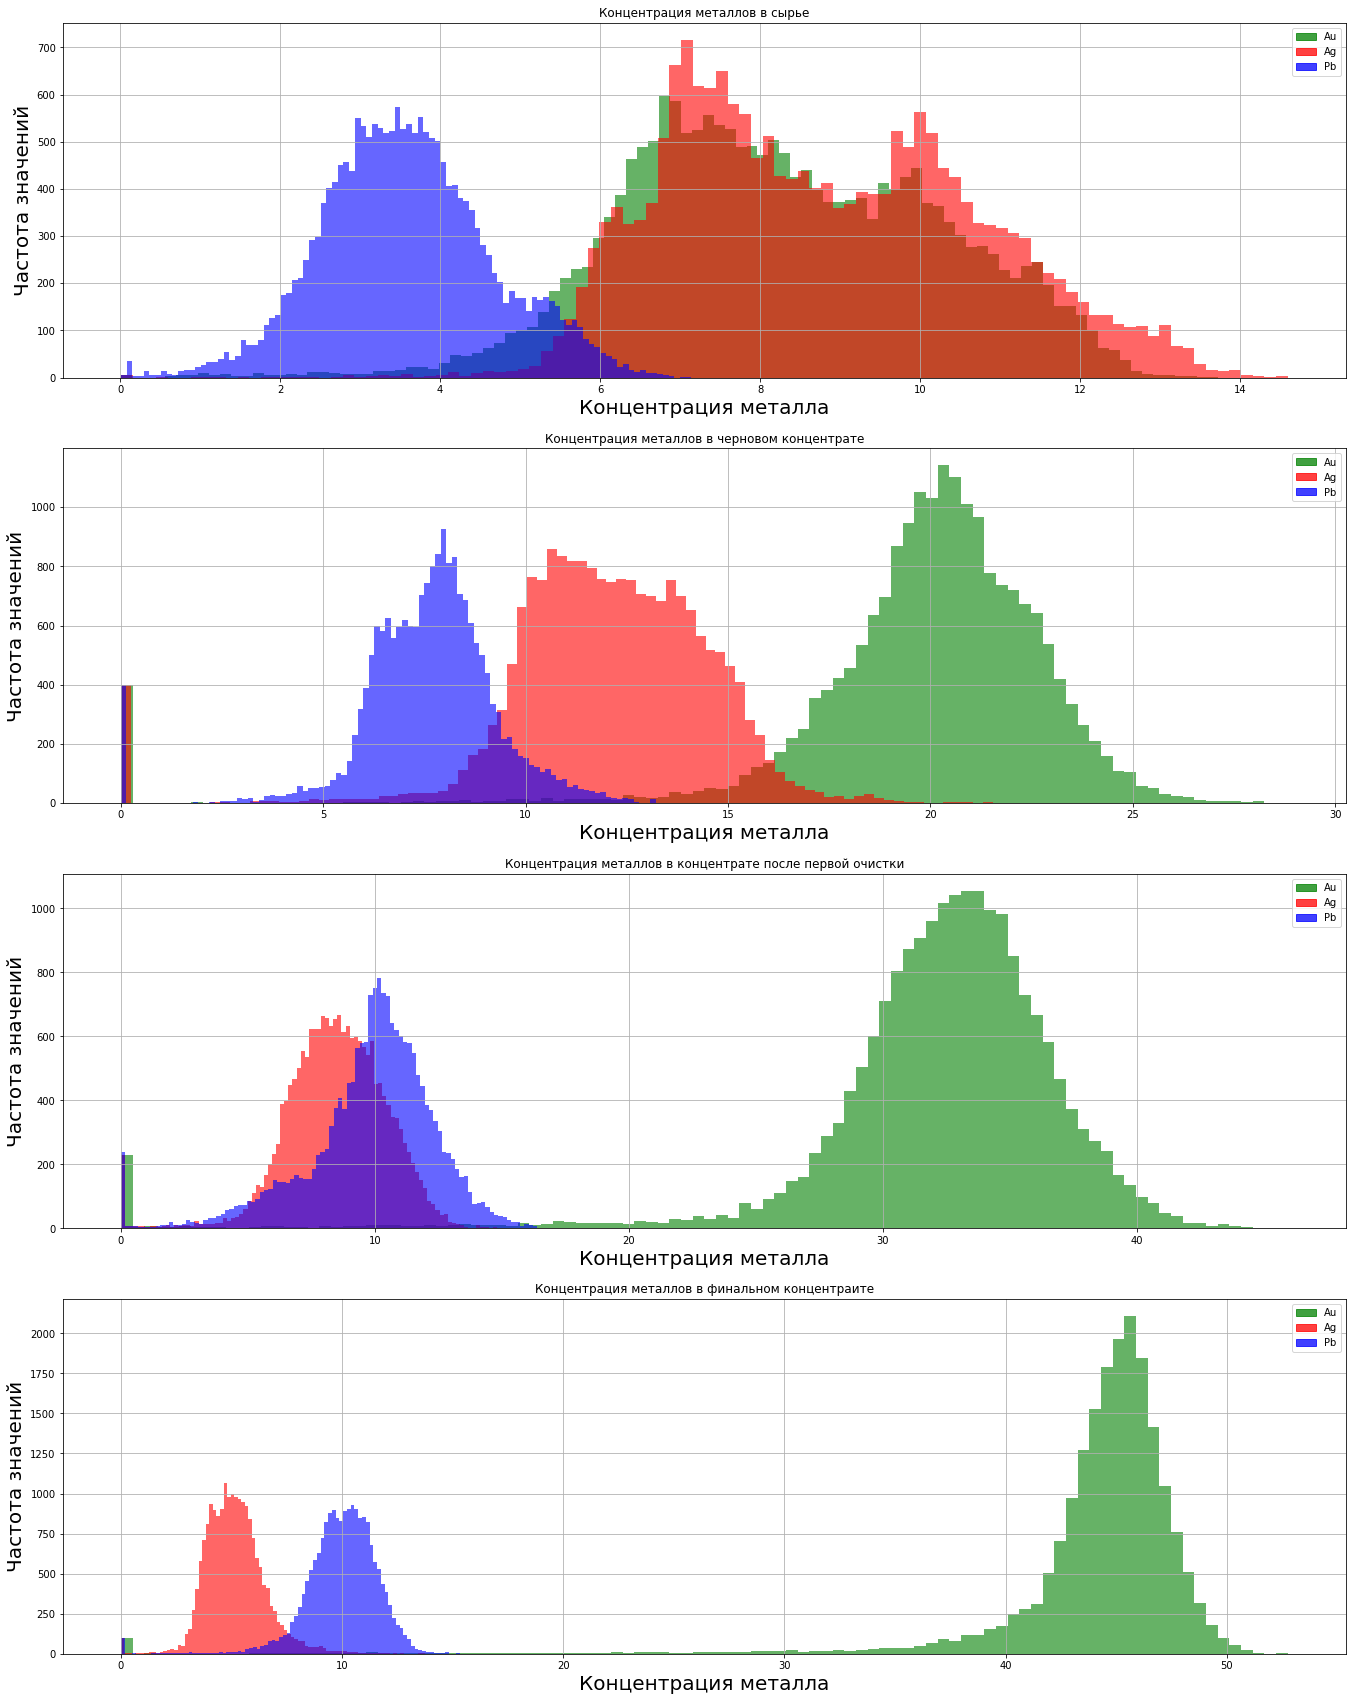

In [13]:
plt.figure(figsize=(23, 30));
colors = {'Au': 'green', 'Ag': 'red', 'Pb': 'blue'}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label], alpha=0.75) for label in labels]
plt.subplot(4, 1, 1, title='Концентрация металлов в сырье');
plt.ylabel('Частота значений', fontsize=20);
plt.xlabel('Концентрация металла', fontsize=20);
data_full['rougher.input.feed_au'].hist(color='green', bins=100, alpha=0.6)
data_full['rougher.input.feed_ag'].hist(color='red', bins=100, alpha=0.6)
data_full['rougher.input.feed_pb'].hist(color='blue', bins=100, alpha=0.6)
plt.legend(handles, labels);
plt.subplot(4, 1, 2, title='Концентрация металлов в черновом концентрате');
plt.ylabel('Частота значений', fontsize=20);
plt.xlabel('Концентрация металла', fontsize=20);
data_full['rougher.output.concentrate_au'].hist(color='green', bins=100, alpha=0.6)
data_full['rougher.output.concentrate_ag'].hist(color='red', bins=100, alpha=0.6)
data_full['rougher.output.concentrate_pb'].hist(color='blue', bins=100, alpha=0.6)
plt.legend(handles, labels);
plt.subplot(4, 1, 3, title='Концентрация металлов в концентрате после первой очистки');
plt.ylabel('Частота значений', fontsize=20);
plt.xlabel('Концентрация металла', fontsize=20);
data_full['primary_cleaner.output.concentrate_au'].hist(color='green', bins=100, alpha=0.6)
data_full['primary_cleaner.output.concentrate_ag'].hist(color='red', bins=100, alpha=0.6)
data_full['primary_cleaner.output.concentrate_pb'].hist(color='blue', bins=100, alpha=0.6)
plt.legend(handles, labels);
plt.subplot(4, 1, 4, title='Концентрация металлов в финальном концентраите');
plt.ylabel('Частота значений', fontsize=20);
plt.xlabel('Концентрация металла', fontsize=20);
data_full['final.output.concentrate_au'].hist(color='green', bins=100, alpha=0.6)
data_full['final.output.concentrate_ag'].hist(color='red', bins=100, alpha=0.6)
data_full['final.output.concentrate_pb'].hist(color='blue', bins=100, alpha=0.6)
plt.legend(handles, labels);

        Заметно увеличение концентрации всех металлов. Больше всего увеличивается концентрация золота. Также на графиках
    видны аномалии, очень много нулевых значений, необходимо от них избавиться.

In [14]:
columns = ['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb',
          'rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb',
          'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_ag', 
          'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_au', 'final.output.concentrate_ag',
          'final.output.concentrate_pb']

In [15]:
data_full = data_full[((data_full[columns] <= data_full[columns].quantile(0.025)) |
                      (data_full[columns] >= data_full[columns].quantile(0.975))).sum(axis=1) == 0]

        Для удаления аномалий на каждом этапе для концентрации каждого металла взят 95%-й доверительный интервал. Теперь 
     графики выглядят следующим образом. 

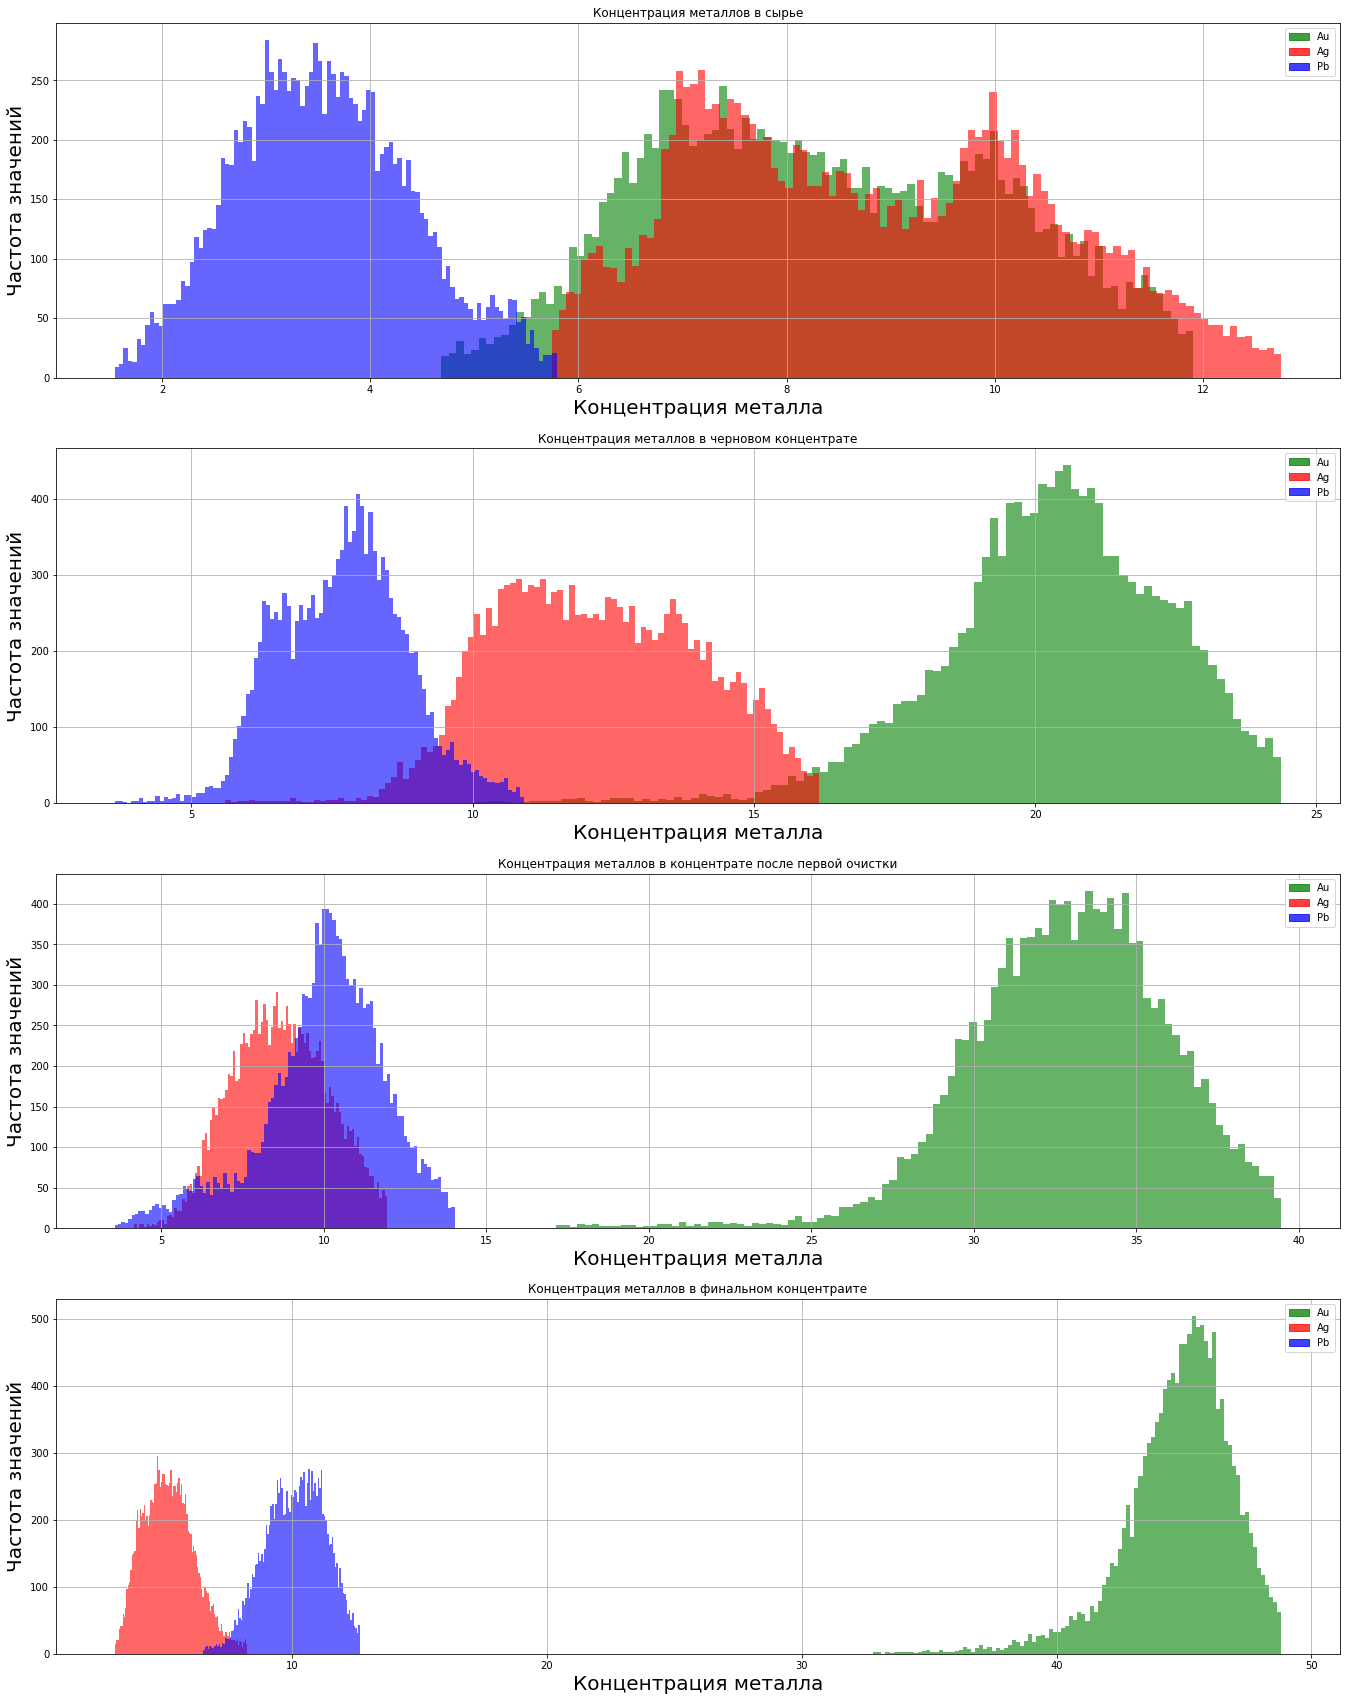

In [16]:
plt.figure(figsize=(23, 30));
colors = {'Au': 'green', 'Ag': 'red', 'Pb': 'blue'}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label], alpha=0.75) for label in labels]
plt.subplot(4, 1, 1, title='Концентрация металлов в сырье');
plt.ylabel('Частота значений', fontsize=20);
plt.xlabel('Концентрация металла', fontsize=20);
data_full['rougher.input.feed_au'].hist(color='green', bins=100, alpha=0.6)
data_full['rougher.input.feed_ag'].hist(color='red', bins=100, alpha=0.6)
data_full['rougher.input.feed_pb'].hist(color='blue', bins=100, alpha=0.6)
plt.legend(handles, labels);
plt.subplot(4, 1, 2, title='Концентрация металлов в черновом концентрате');
plt.ylabel('Частота значений', fontsize=20);
plt.xlabel('Концентрация металла', fontsize=20);
data_full['rougher.output.concentrate_au'].hist(color='green', bins=100, alpha=0.6)
data_full['rougher.output.concentrate_ag'].hist(color='red', bins=100, alpha=0.6)
data_full['rougher.output.concentrate_pb'].hist(color='blue', bins=100, alpha=0.6)
plt.legend(handles, labels);
plt.subplot(4, 1, 3, title='Концентрация металлов в концентрате после первой очистки');
plt.ylabel('Частота значений', fontsize=20);
plt.xlabel('Концентрация металла', fontsize=20);
data_full['primary_cleaner.output.concentrate_au'].hist(color='green', bins=100, alpha=0.6)
data_full['primary_cleaner.output.concentrate_ag'].hist(color='red', bins=100, alpha=0.6)
data_full['primary_cleaner.output.concentrate_pb'].hist(color='blue', bins=100, alpha=0.6)
plt.legend(handles, labels);
plt.subplot(4, 1, 4, title='Концентрация металлов в финальном концентраите');
plt.ylabel('Частота значений', fontsize=20);
plt.xlabel('Концентрация металла', fontsize=20);
data_full['final.output.concentrate_au'].hist(color='green', bins=100, alpha=0.6)
data_full['final.output.concentrate_ag'].hist(color='red', bins=100, alpha=0.6)
data_full['final.output.concentrate_pb'].hist(color='blue', bins=100, alpha=0.6)
plt.legend(handles, labels);

        По графикам видно, что аномалии отсутствуют. Необходимо удалить аномалии из обучающей и тестовой выборок.

In [17]:
#Удаление аномалий из обучающей и тестовой выборок
data_test = pd.DataFrame(data_test['date']).merge(data_full['date']).merge(data_test)
data_train = pd.DataFrame(data_train['date']).merge(data_full['date']).merge(data_train)
display(data_full.shape)
display(data_test.shape)
display(data_train.shape)

(13556, 87)

(3397, 53)

(10159, 87)

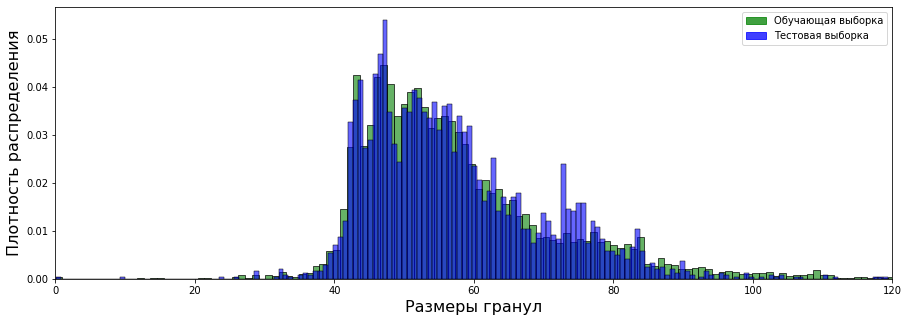

In [18]:
plt.figure(figsize=(15, 5));
colors = {'Обучающая выборка': 'green', 'Тестовая выборка': 'blue'}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label], alpha=0.75) for label in labels]
plt.xlim(0, 120)
plt.xlabel('Размеры гранул', fontsize=16)
plt.ylabel('Плотность распределения', fontsize=16)
sns.histplot(data_train['rougher.input.feed_size'], stat='density', alpha=0.6, color='green', bins=500)
sns.histplot(data_test['rougher.input.feed_size'], stat='density', alpha=0.6, color='blue', bins=500)
plt.legend(handles, labels);

        Распределения размеров гранул на обучающей и тестовой выборках схожи, с такими данными можно работать.

In [19]:
#Удаление выбросов в полной выборке
data_full = pd.DataFrame(data_full['date']).merge(pd.concat([data_test['date'], data_train['date']])).merge(data_full)

display(data_full.shape[0])
display(data_test.shape[0])
display(data_train.shape[0])

13556

3397

10159

In [20]:
#Расчет суммарной концентрации металлов на разных стадиях очистки
data_full['rougher.input.feed_sum'] = data_full['rougher.input.feed_au'] +\
    data_full['rougher.input.feed_ag'] +\
    data_full['rougher.input.feed_pb']
data_full['rougher.output.concentrate_sum'] = data_full['rougher.output.concentrate_au'] +\
    data_full['rougher.output.concentrate_ag'] +\
    data_full['rougher.output.concentrate_pb']
data_full['primary_cleaner.output.concentrate_sum'] = data_full['primary_cleaner.output.concentrate_au'] +\
    data_full['primary_cleaner.output.concentrate_ag'] +\
    data_full['primary_cleaner.output.concentrate_pb']
data_full['final.output.concentrate_sum'] = data_full['final.output.concentrate_au'] +\
    data_full['final.output.concentrate_ag'] +\
    data_full['final.output.concentrate_pb']
data_full.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,rougher.input.feed_sum,rougher.output.concentrate_sum,primary_cleaner.output.concentrate_sum,final.output.concentrate_sum
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,11.836743,6.005818,41885.707031,3481.779053,3520.337158,2.838687,19.793808,11.500771,7.101074,28.029297,87.107763,1.170244,5.008018,0.508728,19.154297,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,34.174427,8.547551,10.389648,19.529297,2.106679,14.936526,2.534912,7.476074,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,2.606185,14.500184,4.694824,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297,14.871440,38.395653,53.111627,58

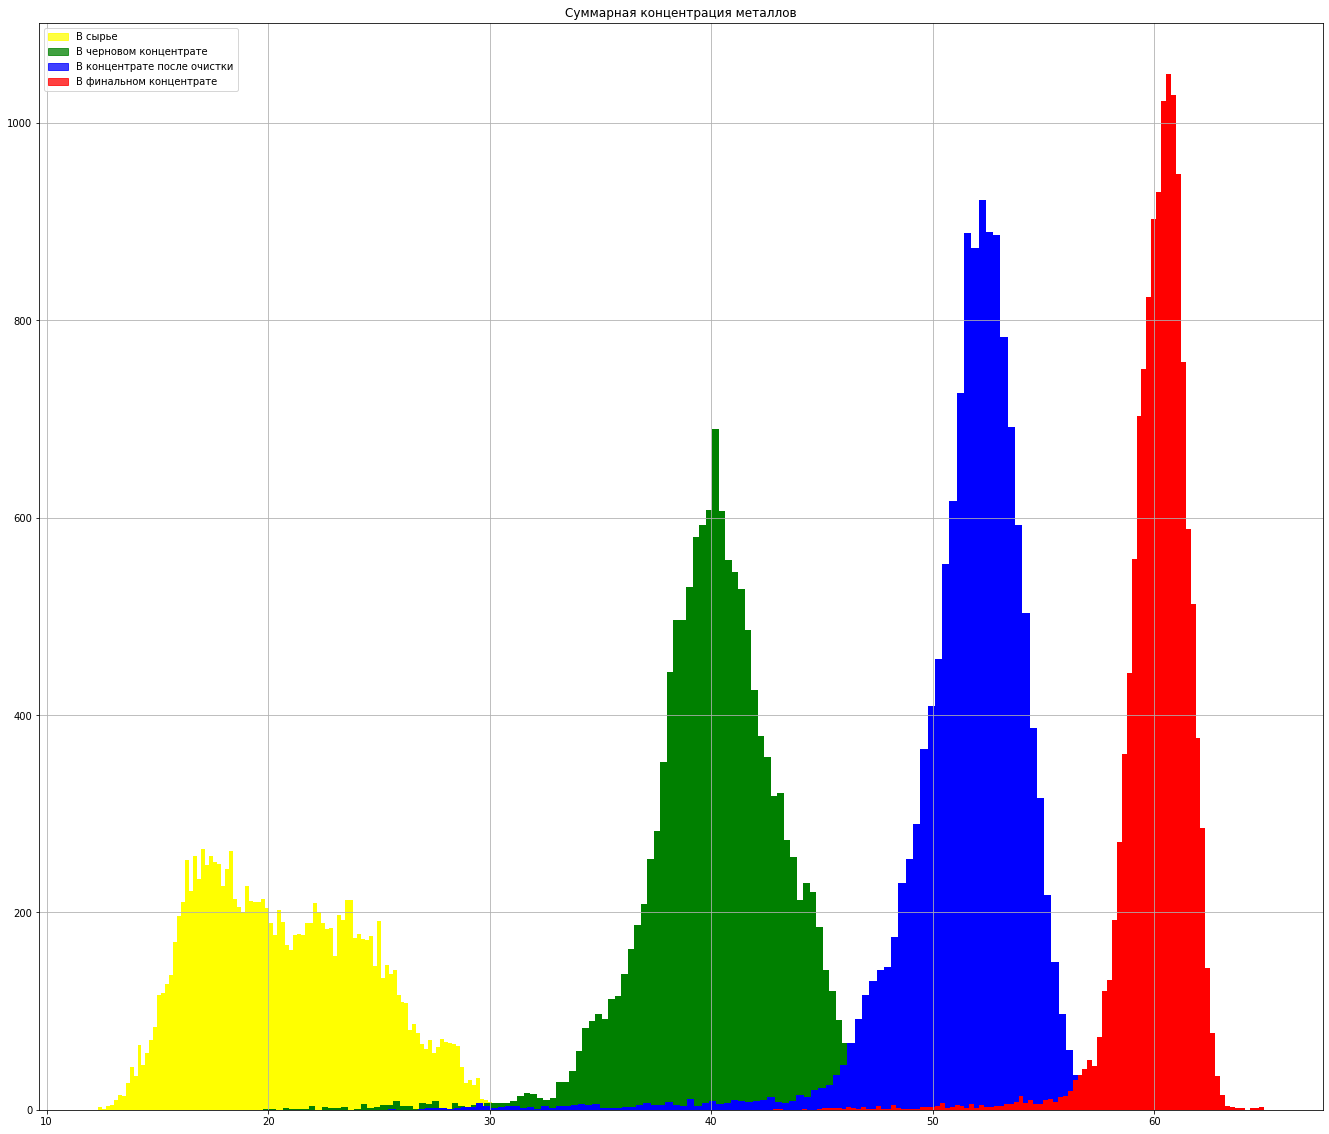

In [21]:
plt.figure(figsize=(23, 20));
plt.title('Суммарная концентрация металлов')
colors = {'В сырье': 'yellow',
          'В черновом концентрате': 'green',
          'В концентрате после очистки': 'blue',
          'В финальном концентрате': 'red'}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label], alpha=0.75) for label in labels]
data_full['rougher.input.feed_sum'].hist(color='yellow', bins=100)
data_full['rougher.output.concentrate_sum'].hist(color='green', bins=100)
data_full['primary_cleaner.output.concentrate_sum'].hist(color='blue', bins=100)
data_full['final.output.concentrate_sum'].hist(color='red', bins=100)
plt.legend(handles, labels);

        Суммарная концентрация металлов растет с каждым этапом очистки. Заметны выбросы, для их удаления взят 90%-й
    доверительный интервал суммарной концентрации металлов на каждом из этапов.

In [22]:
#Удаление недоступных параметров в полной выборке
available_columns = list(data_test.columns)
available_columns.append('rougher.output.recovery')
available_columns.append('final.output.recovery')
data_full = data_full[available_columns]
display(data_full.shape)
display(data_test.shape)
display(data_train.shape)

(13556, 55)

(3397, 53)

(10159, 87)

In [23]:
#Синхронизация выборок
data_test = pd.DataFrame(data_test['date']).merge(data_full['date']).merge(data_full)
data_train = pd.DataFrame(data_train['date']).merge(data_full['date']).merge(data_full)
display(data_full.shape)
display(data_train.shape)
display(data_test.shape)

(13556, 55)

(10159, 55)

(3397, 55)

        Изучено изменение концентрации металлов (Au, Ag, Pb) на различных этапах: в сырье, в черновом концентрате, в
    концентрате после первой очистки и в финальном концетрате. Построены графики распределения. На каждом из этапов заметен
    рост концетрации металлов, причем концентрации золота растет больше концентрации остальных металлов. При изучении
    концентрации были замечены аномалии, для их устранения был взят 95%-й доверительный интервал для каждого этапа и для 
    концентрации каждого металла.
        Произведено сравнение размеров гранул исходного сырья на обучающей и тестовой выборке, построен график. 
    Распределения схожи, поэтому с данными можно работать дальше.
        Посчитана и исследована суммарная концентрация металлов на разных стадиях: в сырье, в черновом концентрате, в 
    концентрате после первой очистки и в финальном концентрате. Заметен рост суммарной концентрации, а также уменьшение
    разброса значений.

## Модель

In [24]:
#Функция подсчета значения sMAPE
def smape(target, predicted):
    smape_value = 0
    for i in range(len(target)):
        smape_value += abs(target[i] - predicted[i]) / ((abs(target[i]) + abs(predicted[i])) / 2)
    smape_value = smape_value / len(target) * 100
    return smape_value

In [25]:
#Функция подсчета финального значения sMAPE
def final_smape(target, predicted):
    target = target.reset_index(drop=True)
    rougher_target = []
    rougher_predicted = []
    final_target = []
    final_predicted = []
    for i in range(len(target)):
        rougher_target.append(target.loc[i, 'rougher.output.recovery'])
        rougher_predicted.append(predicted[i][0])
        final_target.append(target.loc[i, 'final.output.recovery'])
        final_predicted.append(predicted[i][1])
    final_smape_value = 0.25 * smape(rougher_target, rougher_predicted) + 0.75 * smape(final_target, final_predicted)
    return final_smape_value

In [26]:
features_train = data_train.drop(['rougher.output.recovery', 'final.output.recovery', 'date'], axis=1)
features_test = data_test.drop(['rougher.output.recovery', 'final.output.recovery', 'date'], axis=1)
target_train = data_train[['rougher.output.recovery', 'final.output.recovery']]
target_test = data_test[['rougher.output.recovery', 'final.output.recovery']]

print('Размеры и размерности выборок:', features_train.shape, features_test.shape)

Размеры и размерности выборок: (10159, 52) (3397, 52)


In [27]:
scorer = make_scorer(final_smape)

Лучшая глубина дерева: 2 Лучшее значение sMAPE: 7.96%

CPU times: user 8.72 s, sys: 3.05 ms, total: 8.72 s
Wall time: 8.73 s


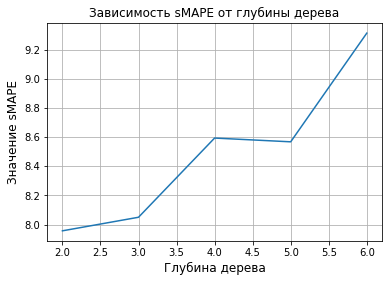

In [28]:
%%time
max_depth = []
smape_values = []
for depth in [None] + [i for i in range(2, 7)]:
    max_depth.append(depth)
    model = DecisionTreeRegressor(random_state=12345, max_depth=depth)
    
    smape_value = cross_val_score(model, features_train, target_train, scoring=scorer).mean()
    smape_values.append(smape_value)
    
    if depth == None:
        best_smape = smape_value
        best_depth = depth

    if smape_value < best_smape: 
        best_smape = smape_value
        best_depth = depth

plt.title('Зависимость sMAPE от глубины дерева');
plt.plot(max_depth, smape_values);
plt.grid(True);
plt.xlabel('Глубина дерева', fontsize=12);
plt.ylabel('Значение sMAPE', fontsize=12);
print('Лучшая глубина дерева:', best_depth, f"Лучшее значение sMAPE: {best_smape:0.2f}%\n");

In [29]:
%%time
for est in range(10, 50, 10):
    for depth in range(1, 5, 1):
        model = RandomForestRegressor(n_estimators=est, random_state=12345, max_depth=depth)
        
        smape_value = cross_val_score(model, features_train, target_train, scoring=scorer).mean()
        smape_values.append(smape_value)
        
        if est == 10 and depth == 1:
            best_depth = 1
            best_estimators = 10
            best_smape = smape_value
        
        if smape_value < best_smape:
            best_depth = depth
            best_estimators = est
            best_smape = smape_value
        print('Глубина леса:', depth, 'Количество деревьев:', est, f'Значение sMAPE: {smape_value:.2f}%')
print('Лучшая глубина леса:', best_depth, "Лучшее количество деревьев:", best_estimators,
      f"Лучшее значение sMAPE: {best_smape:0.2f}%")

Глубина леса: 1 Количество деревьев: 10 Значение sMAPE: 7.69%
Глубина леса: 2 Количество деревьев: 10 Значение sMAPE: 7.70%
Глубина леса: 3 Количество деревьев: 10 Значение sMAPE: 7.64%
Глубина леса: 4 Количество деревьев: 10 Значение sMAPE: 7.88%
Глубина леса: 1 Количество деревьев: 20 Значение sMAPE: 7.67%
Глубина леса: 2 Количество деревьев: 20 Значение sMAPE: 7.66%
Глубина леса: 3 Количество деревьев: 20 Значение sMAPE: 7.54%
Глубина леса: 4 Количество деревьев: 20 Значение sMAPE: 7.64%
Глубина леса: 1 Количество деревьев: 30 Значение sMAPE: 7.66%
Глубина леса: 2 Количество деревьев: 30 Значение sMAPE: 7.63%
Глубина леса: 3 Количество деревьев: 30 Значение sMAPE: 7.51%
Глубина леса: 4 Количество деревьев: 30 Значение sMAPE: 7.61%
Глубина леса: 1 Количество деревьев: 40 Значение sMAPE: 7.65%
Глубина леса: 2 Количество деревьев: 40 Значение sMAPE: 7.63%
Глубина леса: 3 Количество деревьев: 40 Значение sMAPE: 7.52%
Глубина леса: 4 Количество деревьев: 40 Значение sMAPE: 7.58%
Лучшая г

In [30]:
scaler = StandardScaler()
scaler.fit(features_train)

standart_features_train = pd.DataFrame(scaler.transform(features_train), columns=features_train.columns)

display(standart_features_train.head())

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,-1.169265,-1.683980,-1.498320,-0.008831,0.455250,-0.163395,-0.163028,0.000607,-0.645502,-0.241062,1.484176,0.415048,1.341816,0.305891,1.800734,0.157488,1.792689,0.041042,2.255359,0.102784,-0.082685,0.028787,-0.487098,0.414379,-0.137315,-0.064927,-0.381147,-0.207568,-0.385109,-0.784970,-0.347209,-0.188986,0.007933,-0.084908,-0.474991,0.098146,-0.005636,0.058794,-0.676988,-0.216362,-0.048406,-0.134810,-0.936452,-0.421956,-0.572214,-0.732602,-1.050349,-0.353698,-0.755060,-0.421088,-0.939698,-2.944408
1,-1.173882,-1.646978,-1.520423,-0.245705,0.471960,-0.089343,-0.167902,-0.001430,-0.641940,-0.199291,1.471498,0.156455,1.332735,0.173786,1.808515,0.180483,1.762705,0.115832,2.156504,0.132069,-0.040024,0.034545,-0.522576,0.467263,-0.137315,-0.037426,-0.169853,-0.281931,-0.191589,-0.211437,-0.147391,-0.212588,0.088835,-0.225601,-0.470052,0.072602,-0.006343,0.075361,-0.675571,-0.301132,-0.022714,-0.137249,-0.941241,-0.483667,-0.602557,-0.678464,-1.029700,-0.406951,-0.772643,-0.424082,-0.967197,-2.768088
2,-1.244879,-1.674185,-1.645006,-0.196713,0.517330,-0.079757,-0.183888,0.174075,-0.645425,-0.199383,1.463536,0.155520,1.328870,0.171640,1.805197,0.180474,1.762442,0.131012,2.160052,0.125504,-0.060323,0.197752,-0.566463,0.788441,-0.137315,-0.059970,0.033422,-0.248080,0.001296,-0.237165,0.051578,-0.269179,0.189651,-0.248501,-0.447600,0.073651,-0.006835,0.082100,-0.684799,-0.289827,0.308281,-0.147727,-0.936807,-0.422629,-0.610223,-0.675294,-1.023944,-0.405781,-0.767248,-0.422343,-0.961749,-2.815851
3,-1.393773,-1.718749,-1.787622,0.003212,0.637687,-0.068101,-0.275686,0.179388,-0.644839,-0.200700,1.467592,0.145144,1.330500,0.172403,1.794803,0.177456,1.772516,0.129504,2.159566,0.137347,-0.121298,0.190906,-0.604048,0.790286,-0.137315,-0.049144,0.020713,-0.283678,0.003448,-0.204889,0.038578,-0.264008,0.193304,-0.254256,-0.458895,0.086794,0.004953,0.083753,-0.676172,-0.299784,0.307702,-0.148711,-0.932616,-0.388581,-0.592601,-0.676259,-1.042219,-0.379223,-0.774020,-0.415298,-0.965903,-2.774172
4,-1.671071,-1.708022,-2.081403,-0.561263,0.617967,-0.140230,-0.488139,0.175403,-0.645676,-0.196029,1.468432,0.1624

In [31]:
%%time
model = LinearRegression()

smape_value = cross_val_score(model, standart_features_train, target_train, scoring=scorer).mean()
print(f'Значение sMAPE для линейной регрессии: {smape_value:0.2f}%')

Значение sMAPE для линейной регрессии: 8.55%
CPU times: user 585 ms, sys: 799 ms, total: 1.38 s
Wall time: 1.39 s


        После обучения нескольких моделей и поиска наилучших параметров получены следующие результаты: для модели дерева 
    решений наилучшее значение sMAPE равно 7,96%, для модели случайного леса наилучшее значение равно 7,51%, а для линейной 
    регрессии - 8,55%. Наилучшая модель - модель случайного леса. Необходимо провести тестирование лучшей модели на
    тестовой выборке.

In [32]:
model = RandomForestRegressor(n_estimators=30, random_state=12345, max_depth=3)
model.fit(features_train, target_train)
predicted = model.predict(features_test)
smape_value = final_smape(target_test, predicted)

dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(features_train, target_train)
dummy_predicted = dummy_regr.predict(features_test)
dummy_smape = final_smape(target_test, dummy_predicted)

print(f'Значение sMAPE для лучшей модели: {smape_value:.2f}%')
print(f'Значение sMAPE для константной модели: {dummy_smape:.2f}%')

Значение sMAPE для лучшей модели: 5.99%
Значение sMAPE для константной модели: 7.33%


        Была написана функция для расчета значения sMAPE. Также написана функция для расчета финального значения sMAPE,
    которое состоит из значения sMAPE для эффективности обогащения чернового концентрата и значения sMAPE для эффективности
    обогащения финального концентрата.
        Обучено несколько моделей, для них найдены наилучшие параметры. В итоге для модели дерева решений наилучшее значение
    sMAPE равно 7,96%, для модели случайного леса наилучшее значение равно 7,51%, а для линейной регрессии - 8,55%
        Наилучшая модель проверена на тестовой выборке, значение sMAPE равно 5,99%. Также для проверки на адекватность
    произведено сравнение с константной моделью, результат sMAPE на констанстной модели равен 7,33%, что означает, что
    наша модель прошла тест на адекватность. 

| Модель | sMAPE | 
| --- | --- |
| Линейная регрессия | 8.55% | 
| Дерево решений | 7.96% | 
| Случайный лес | 7.51% |    

# Вывод
## Подготовка данных
    - Данные были считаны из трех файлов и записаны в переменные data_train - обучающая выборка, data_test - тестовая
    выборка и data_full - полная выборка;
    - Рассчитано значение MAE между расчетами и значением признака в обучающей выборке. Значение MAE очень маленькое, значит 
    расчеты были произведены верно;
    - Дубликатов в значениях найдено не было;
    - Были найдены пропуски, заполнены ближайшим по времени известным значением, так как нам известно, что соседние по
    времени параметры часто похожи.
## Анализ данных
    - Изучено изменение концентрации металлов (Au, Ag, Pb) на различных этапах, построены графики распределения;
    - На каждом из этапов заметен рост концетрации металлов, причем концентрации золота растет больше концентрации остальных 
    металлов;
    - На этапе изучения концентрации металлов замечены аномалии, очень много значений близких к нулю, было принято решение
    избавиться от них, для этого на каждом этапе для концентрации каждого металла взят 95%-й доверительный интервал;
    - Изучено распределение размеров гранул на обучающей и тестовой выборках. Распределения схожи, поэтому с данными можно
    работать. 
    - Посчитана и исследована суммарная концентрация металлов на разных стадиях: в сырье, в черновом концентрате, в 
    концентрате после первой очистки и в финальном концентрате. Заметен рост суммарной концентрации, а также уменьшение
    разброса значений.
## Построение и выбор наилучшей модели
    - Была написана функция для расчета значения sMAPE;
    - Написана функция для расчета финального значения sMAPE, которое состоит из значения sMAPE для эффективности обогащения 
    чернового концентрата и значения sMAPE для эффективности обогащения финального концентрата;
    - Обучено несколько моделей, для них найдены наилучшие параметры;
    - Для модели дерева решений наилучшее значение sMAPE равно 7,96%, для модели случайного леса наилучшее значение равно 
    7,51%, а для линейной регрессии - 8,55%;
    - Наилучшая модель - случайный лес, она проверена на тестовой выборке, значение sMAPE равно 5,99%;
    - Проведена проверка на адекватность, константная модель дает результат sMAPE на тестовой выборке равное 7,33%, что
    хуже нашей модели, значит проверка на адекватность моделью пройдена.